1.no feature selction done 
2.no outlier  treatment


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df=pd.read_clipboard()

E:\programs\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
imp=['ownfax', 'ownvcr', 'active', 'voice', 'internet', 'owntv', 'tollmon', 'equipten', 'card2spent', 'equip', 'tollfree', 'cardmon', 'wireten', 'ebill', 'cardtenurecat', 'equipmon', 'wireless', 'card2benefit', 'pager', 'response_03', 'response_01', 'card2tenurecat', 'ownpc', 'owngame', 'card2type', 'card2fee', 'wiremon', 'tollten', 'cardspent', 'owncd', 'churn', 'callcard', 'multline', 'forward', 'owndvd', 'response_02', 'tenure', 'cardten', 'ownpda', 'ownipod', 'card2', 'news']

In [5]:
ndf=df.loc[:,imp]

In [6]:
a=['address', 'age', 'bfast', 'birthmonth', 'callid', 'callwait', 'card2tenure', 'cardtenure', 'cartype', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer','custid', 'ed', 'employ', 'hourstv', 'lncardmon', 'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten', 'longmon', 'longten', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish', 'pets_small', 'spoused']

In [7]:
a=set(a)

In [8]:
b=set(df.columns)

In [9]:
ndf=df.loc[:,b-a]

In [10]:
ndf['total_spend']=ndf['cardspent']+ndf['card2spent']

In [11]:
del ndf['card2spent']

In [12]:
del ndf['cardspent']

In [13]:
import seaborn as sns
import  matplotlib

In [14]:
ndf.describe()

,voice,news,response_01,carcatvalue,card,owndvd,cardbenefit,owngame,union,cars,...,card2tenurecat,wireless,cardtenurecat,vote,callcard,retire,othdebt,gender,polview,total_spend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.303000,0.472600,0.083600,1.389400,2.714200,0.913600,2.505800,0.474800,0.15120,2.130600,...,3.571400,0.26880,3.782200,0.518000,0.716200,0.147600,3.654456,0.503600,4.08860,498.07863
std,0.459601,0.499299,0.276815,1.081296,1.184905,0.280982,1.117236,0.499415,0.35828,1.307473,...,1.363845,0.44338,1.353783,0.499726,0.450886,0.354739,5.395214,0.500037,1.38706,351.52927
min,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,8.11000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.00000,1.000000,...,2.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.980000,0.000000,3.00000,276.28250
50%,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,0.000000,0.00000,2.000000,...,4.000000,0.00000,4.000000,1.000000,1.000000,0.000000,2.100000,1.000000,4.00000,414.25000
75%,1.000000,1.000000,0.000000,2.000000,4.000000,1.000000,3.250000,1.000000,0.00000,3.000000,...,5.000000,1.00000,5.000000,1.000000,1.000000,0.000000,4.310000,1.000000,5.00000,615.56250
max,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,4.000000,1.000000,1.00000,8.000000,...,5.000000,1.00000,5.000000,1.000000,1.000000,1.000000,141.460000,1.000000,7.00000,4881.05000


In [15]:
ndf=ndf.replace('#NULL!',np.NaN)

In [16]:
ndf.townsize=ndf.townsize.astype('float')

In [17]:
ndf.dtypes.value_counts()

float64    80
object      1
dtype: int64

In [18]:
ndf.townsize.dtype

dtype('float64')

In [19]:
 del ndf['cardten']

In [20]:
ndf.card2fee.nunique(dropna=True)

2

In [21]:
df['pager']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: pager, Length: 5000, dtype: float64

In [22]:
c=list(ndf.columns)

In [23]:
a=[]
b=[]
for e in c:
    if ndf[e].nunique(dropna=True)>5:
        a.append(e)
    else:
        b.append(e)
        

In [24]:
df_dis=ndf.loc[:,a]

In [25]:
df_con=ndf.loc[:,b]

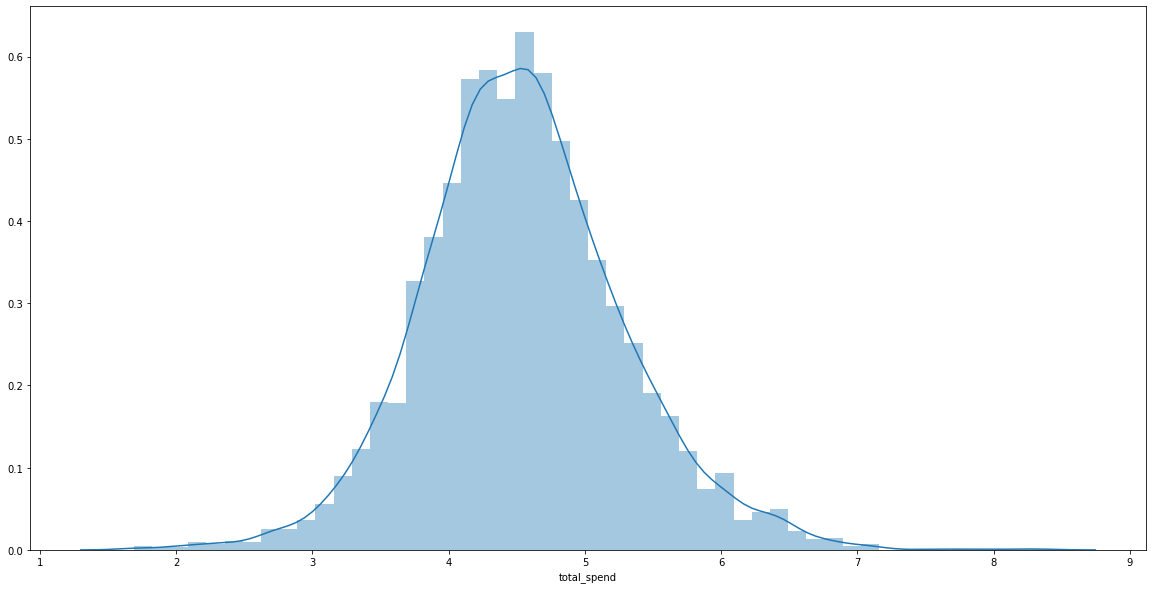

In [26]:
sns.distplot(np.sqrt(np.sqrt(df_dis.total_spend)))

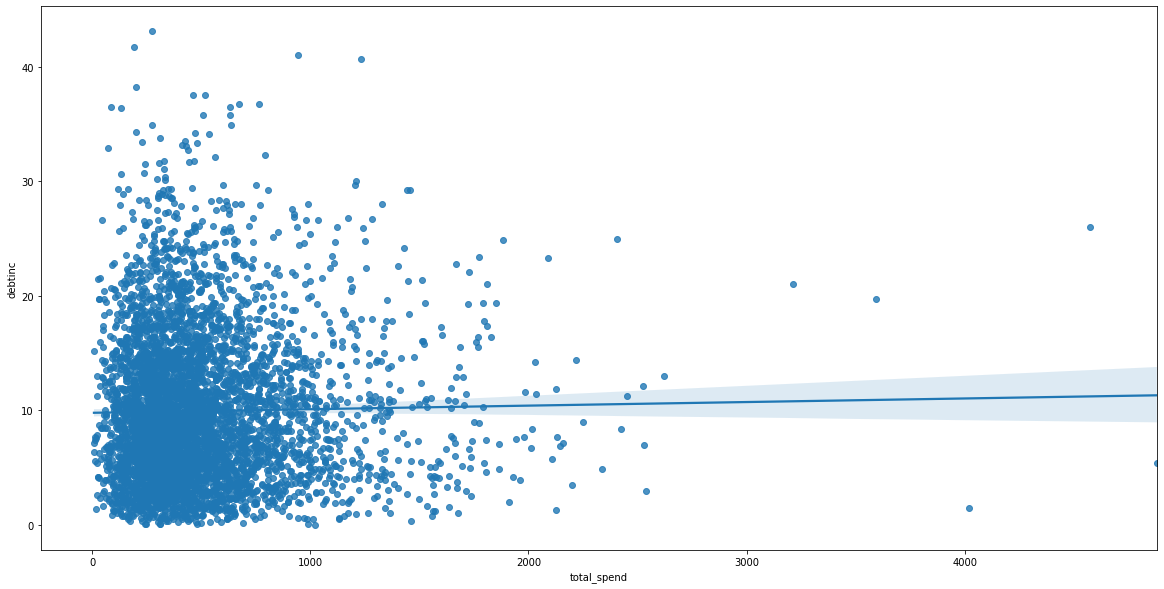

In [27]:
sns.regplot(x='total_spend',y='debtinc',data=df_dis)

In [28]:
df_con

,voice,news,response_01,carcatvalue,card,owndvd,cardbenefit,owngame,union,carown,...,polcontrib,ownipod,inccat,card2tenurecat,wireless,cardtenurecat,vote,callcard,retire,gender
0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,1.0,...,0.0,0.0,2.0,5.0,0.0,5.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,0.0,1.0,...,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,1.0,...,1.0,0.0,5.0,5.0,0.0,5.0,1.0,1.0,0.0,0.0
4996,0.0,0.0,0.0,3.0,3.0,1.0,4.0,0.0,0.0,1.0,...,0.0,0.0,4.0,4.0,1.0,4.0,0.0,1.0,0.0,0.0
4997,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,4.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0
4998,0.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,5.0,4.0,0.0,5.0,0.0,1.0,0.0,0.0


In [29]:
ndf.equipten.value_counts()[0]/ndf.shape[0]*100
    

65.92

In [30]:
ndf.tollten.value_counts()[0]/ndf.shape[0]*100

52.44

In [31]:
#more than 70 % values in wireten are null so it is wise to drop columns
ndf=ndf.drop(['equipten','tollten'],axis='columns')

In [32]:
df_dis=df_dis.drop(['wireten','equipten','tollten'],axis='columns')

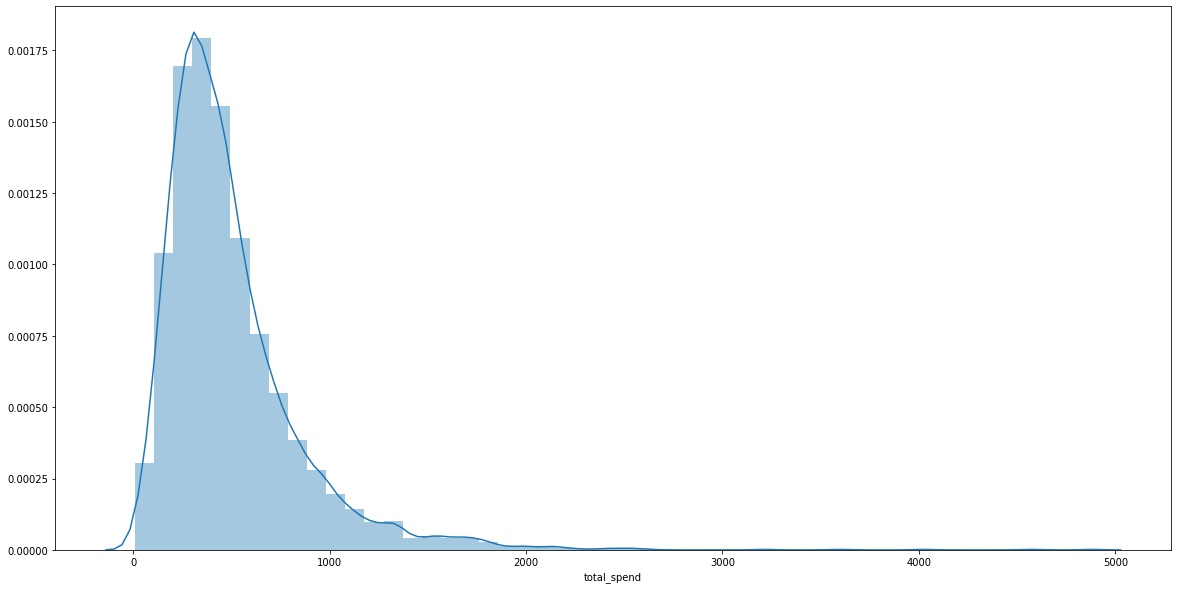

In [33]:
sns.distplot(df_dis.total_spend)

In [34]:
df_dis.total_spend.describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: total_spend, dtype: float64

In [35]:
ndf['trans_spend']=np.sqrt(np.sqrt(ndf.total_spend))

In [36]:
del ndf['total_spend']

In [37]:
equ='trans_spend~card2fee+card2benefit+internet+owndvd+wireless+tollfree+active+ownipod+pager+ownpda+tenure+churn+multline+voice+owngame+ownpc+wiremon+callcard+equipmon+equip+forward+card2+ownvcr+owncd+card2type+response_03+tollmon+ebill+news+response_02+ownfax+cardmon+cardtenurecat+owntv+response_01+card2tenurecat'

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x,y=train_test_split(ndf,test_size=0.3,random_state=1234)

In [40]:
ndf=ndf.fillna(0)

In [41]:
x=ndf[ndf.columns.difference(['trans_spend'])]
y=ndf['trans_spend']

In [42]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

## model with whole data set

In [43]:
import statsmodels.formula.api as smf
model = smf.ols(equ, data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.421
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.82e-42
Time:                        11:04:36   Log-Likelihood:                -5458.1
No. Observations:                5000   AIC:                         1.099e+04
Df Residuals:                    4963   BIC:                         1.123e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9879      0.100     39.

### feature engineeering

In [48]:
from sklearn.linear_model import Lasso


In [49]:
Lasso(alpha=0.1).fit(x,y).coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -8.70191723e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.14308270e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.16461989e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.51412605e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.44789392e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [90]:
ls=pd.DataFrame(data=Lasso(alpha=0.1).fit(x,y).coef_,index=x.columns,columns=['a'])

In [97]:
list(ls[ls['a']<0].index)

['card', 'cardmon', 'tenure']

In [98]:
list(ls[ls['a']>0].index)

['carvalue', 'equipmon', 'income', 'wireten']

In [99]:
lasso_imp=[list(ls[ls['a']>0].index),list(ls[ls['a']<0].index)]

In [100]:
lasso_imp

[['carvalue', 'equipmon', 'income', 'wireten'], ['card', 'cardmon', 'tenure']]

In [47]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15).fit(x,y)
bool_RFE = rfe.get_support()


In [54]:
x.loc[:,bool_RFE]

,callcard,card,card2,card2fee,churn,gender,inccat,owncd,owndvd,owntv,ownvcr,response_03,retire,voice,wireless
0,1.0,3.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,2.0,4.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,1.0,3.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4996,1.0,3.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4997,1.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4998,1.0,3.0,4.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(x,y)
F_values = pd.Series(F_values, name='F_values')
p_values = pd.Series(p_values, name='p_values')
col_names = pd.Series(x.columns,name='col_names')
f_result = pd.concat([col_names,F_values,p_values],axis=1)
f1=list(f_result.sort_values(by=["F_values"], ascending=False).head(15).col_names)

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector = SelectKBest(f_classif, k=15)
selector.fit(x,y)
K_Best = x.columns[selector.get_support()]
f=list(K_Best)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
VIF = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF = pd.Series(VIF, name='VIF')
cols = pd.Series(x.columns, name='Column_Name')
VIF_res = pd.concat([cols,VIF],axis=1)
vif=list(VIF_res.sort_values(by=['VIF']).head(15).Column_Name)

In [58]:
[f1,f,vif]

[['inccat',
  'income',
  'carvalue',
  'othdebt',
  'card',
  'creddebt',
  'carcatvalue',
  'retire',
  'owndvd',
  'ownvcr',
  'owncd',
  'empcat',
  'wireten',
  'edcat',
  'wiremon'],
 ['carcatvalue',
  'card2benefit',
  'carown',
  'carvalue',
  'churn',
  'creddebt',
  'debtinc',
  'default',
  'edcat',
  'internet',
  'othdebt',
  'ownpda',
  'reason',
  'response_02',
  'tenure'],
 ['response_01',
  'response_03',
  'response_02',
  'union',
  'card2fee',
  'cardfee',
  'telecommute',
  'polcontrib',
  'polparty',
  'carbuy',
  'churn',
  'pets',
  'default',
  'active',
  'gender']]

In [60]:
eqn='trans_spend~active+carbuy+carcatvalue+card+card2benefit+card2fee+cardfee+carown+carvalue+churn+creddebt+debtinc+default+edcat+empcat+gender+inccat+internet+othdebt+owncd+owndvd+ownpda+owntv+ownvcr+pets+polcontrib+polparty+reason+response_01+response_02+response_03+retire+telecommute+tenure+union+wiremon'

In [61]:
n=['active','carbuy','carcatvalue','card','card2benefit','card2fee','cardfee','carown','carvalue','churn','creddebt','debtinc','default','edcat','empcat','gender','inccat','income','internet','othdebt','owncd','owndvd','ownpda','owntv','ownvcr','pets','polcontrib','polparty','reason','response_01','response_02','response_03','retire','telecommute','tenure','union','wiremon']

In [62]:
len(n)

37

In [63]:
model2 = smf.ols(eqn, data=ndf).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     42.72
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.45e-259
Time:                        11:05:43   Log-Likelihood:                -4931.6
No. Observations:                5000   AIC:                             9937.
Df Residuals:                    4963   BIC:                         1.018e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4358      0.092     48.104   

In [103]:
lasso_imp

[['carvalue', 'equipmon', 'income', 'wireten'], ['card', 'cardmon', 'tenure']]

In [109]:
lasso_eqn='trans_spend~carvalue+equipmon+income+card+cardmon'

In [110]:
lasso = smf.ols(lasso_eqn, data=ndf).fit()
print(lasso.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.92e-230
Time:                        12:06:39   Log-Likelihood:                -5067.8
No. Observations:                5000   AIC:                         1.015e+04
Df Residuals:                    4994   BIC:                         1.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6883      0.027    171.565      0.0

### from th above model it's evident that these variables  'carvalue,equipmon,income,card,cardmon' were able to explain almost 20% of variance in the target variable, so we regard them as top 4 key drivers for the  customers spend